# NBA Player Analysis: Cleveland Cavaliers

In [118]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('/Users/giovanni-lunetta/uconn_masters/s1/opim5605/project2/data/complete_cleaned_dataset.csv')
df.head()

,reg_season_Age,reg_season_G,reg_season_GS,reg_season_AS,reg_season_MP,reg_season_FG,reg_season_FGA,reg_season_2P,reg_season_2PA,reg_season_3P,...,reg_season_DRB%,reg_season_TRB%,reg_season_AST%,reg_season_STL%,reg_season_BLK%,reg_season_TOV%,reg_season_USG%,Player_Cleaned,Salary,Adjusted Salary
0,23,76,76,1,34.9,9.4,20.3,6.3,12.3,3.1,...,9.6,5.9,46.7,1.3,0.2,14.5,34.4,traeyoung,8326471.0,9080829.0
1,26,68,67,0,30.8,6.5,12.9,4.5,8.0,1.9,...,30.4,18.0,12.2,1.2,2.8,11.0,23.3,christianwood,13666667.0,14904833.0
2,20,62,31,0,21.7,3.1,6.8,1.9,2.9,1.2,...,8.2,5.0,6.3,1.2,0.8,8.4,14.9,ziairewilliams,4373040.0,4769226.0
3,24,61,61,0,29.6,4.4,6.0,4.4,6.0,0.0,...,20.5,17.6,9.7,1.5,6.8,13.4,11.5,robertwilliams,3661976.0,3993742.0
4,26,73,73,1,31.9,6.5,14.0,4.4,8.5,2.2,...,10.9,7.6,10.8,1.6,2.1,9.0,23.1,andrewwiggins,31579390.0,34440406.0


In [120]:
df.describe()

,reg_season_Age,reg_season_G,reg_season_GS,reg_season_AS,reg_season_MP,reg_season_FG,reg_season_FGA,reg_season_2P,reg_season_2PA,reg_season_3P,...,reg_season_ORB%,reg_season_DRB%,reg_season_TRB%,reg_season_AST%,reg_season_STL%,reg_season_BLK%,reg_season_TOV%,reg_season_USG%,Salary,Adjusted Salary
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02,1.750000e+02
mean,26.314286,64.788571,56.411429,0.154286,29.972571,5.578286,11.945143,3.945143,7.408000,1.633714,...,4.433714,15.760000,10.096000,17.348571,1.534857,1.801714,11.877714,21.253714,1.467750e+07,1.600724e+07
std,4.215267,11.986865,16.273238,0.362259,4.570689,2.157182,4.610666,1.984876,3.641356,0.944649,...,3.540432,6.563684,4.730378,9.825155,0.519822,1.421003,3.506909,6.192141,1.180061e+07,1.286972e+07
min,19.000000,29.000000,28.000000,0.000000,17.500000,1.800000,3.600000,0.400000,0.800000,0.000000,...,0.900000,5.300000,3.600000,4.500000,0.500000,0.000000,5.800000,9.500000,5.735760e+05,6.255400e+05
25%,23.000000,57.500000,42.000000,0.000000,27.300000,3.850000,8.200000,2.550000,4.600000,1.000000,...,1.900000,10.900000,6.500000,9.000000,1.200000,0.850000,9.600000,16.350000,4.618051e+06,5.036435e+06
50%,26.000000,67.000000,61.000000,0.000000,30.700000,5.500000,11.500000,3.500000,6.800000,1.600000,...,3.000000,13.800000,8.600000,15.200000,1.400000,1.300000,11.400000,20.800000,1.100000e+07,1.199657e+07
75%,29.500000,74.000000,69.500000,0.000000,33.550000,6.900000,15.150000,5.200000,9.650000,2.300000,...,5.900000,19.750000,12.350000,24.400000,1.800000,2.350000,13.900000,25.400000,2.096607e+07,2.286555e+07
max,37.000000,82.000000,82.000000,1.000000,37.900000,11.400000,21.800000,9.500000,18.300000,4.500000,...,18.000000,36.300000,26.200000,46.700000,3.400000,8.300000,31.900000,37.400000,4.578097e+07,4.992861e+07


In [121]:
df.shape

(175, 51)

In [122]:
df.columns

Index(['reg_season_Age', 'reg_season_G', 'reg_season_GS', 'reg_season_AS',
       'reg_season_MP', 'reg_season_FG', 'reg_season_FGA', 'reg_season_2P',
       'reg_season_2PA', 'reg_season_3P', 'reg_season_3PA', 'reg_season_FT',
       'reg_season_FTA', 'reg_season_ORB', 'reg_season_DRB', 'reg_season_TRB',
       'reg_season_AST', 'reg_season_STL', 'reg_season_BLK', 'reg_season_TOV',
       'reg_season_PF', 'reg_season_PTS', 'reg_season_FG%', 'reg_season_2P%',
       'reg_season_3P%', 'reg_season_FT%', 'reg_season_TS%', 'reg_season_eFG%',
       'reg_season_Pos', 'reg_season_WS', 'reg_season_ORtg', 'reg_season_DRtg',
       'reg_season_OWS', 'reg_season_DWS', 'reg_season_WS/48',
       'reg_season_OBPM', 'reg_season_DBPM', 'reg_season_BPM',
       'reg_season_VORP', 'reg_season_PER', 'reg_season_ORB%',
       'reg_season_DRB%', 'reg_season_TRB%', 'reg_season_AST%',
       'reg_season_STL%', 'reg_season_BLK%', 'reg_season_TOV%',
       'reg_season_USG%', 'Player_Cleaned', 'Salary', 'Adju

In [123]:
df = df[df['Player_Cleaned'] != 'jakobpoeltl']

In [124]:
df.shape

(175, 51)

In [125]:
df.columns

Index(['reg_season_Age', 'reg_season_G', 'reg_season_GS', 'reg_season_AS',
       'reg_season_MP', 'reg_season_FG', 'reg_season_FGA', 'reg_season_2P',
       'reg_season_2PA', 'reg_season_3P', 'reg_season_3PA', 'reg_season_FT',
       'reg_season_FTA', 'reg_season_ORB', 'reg_season_DRB', 'reg_season_TRB',
       'reg_season_AST', 'reg_season_STL', 'reg_season_BLK', 'reg_season_TOV',
       'reg_season_PF', 'reg_season_PTS', 'reg_season_FG%', 'reg_season_2P%',
       'reg_season_3P%', 'reg_season_FT%', 'reg_season_TS%', 'reg_season_eFG%',
       'reg_season_Pos', 'reg_season_WS', 'reg_season_ORtg', 'reg_season_DRtg',
       'reg_season_OWS', 'reg_season_DWS', 'reg_season_WS/48',
       'reg_season_OBPM', 'reg_season_DBPM', 'reg_season_BPM',
       'reg_season_VORP', 'reg_season_PER', 'reg_season_ORB%',
       'reg_season_DRB%', 'reg_season_TRB%', 'reg_season_AST%',
       'reg_season_STL%', 'reg_season_BLK%', 'reg_season_TOV%',
       'reg_season_USG%', 'Player_Cleaned', 'Salary', 'Adju

In [126]:
df = df[df['reg_season_MP'] > 11]
df = df[df['reg_season_GS'] > 27]

In [127]:
# Subsetting the DataFrame to include only rows where Adjusted Salary is null
df_subset = df[df['Adjusted Salary'].isnull()]

df.dropna(inplace=True)

In [128]:
df.shape

(175, 51)

In [129]:
# df.to_csv('/Users/giovanni-lunetta/uconn_masters/opim5605/project2/new_player_data/complete_cleaned_dataset.csv', index=False)

In [130]:
grouping_1_features = ['reg_season_3P%', 'reg_season_TOV%', 'reg_season_FT']
grouping_2_features = ['reg_season_Age', 'reg_season_USG%', 'Adjusted Salary']

In [131]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the specific feature groups
df[grouping_1_features] = scaler.fit_transform(df[grouping_1_features])
df[grouping_2_features] = scaler.fit_transform(df[grouping_2_features])


In [132]:
from sklearn.metrics import silhouette_score

def determine_optimal_clusters(data, feature_names, max_clusters=10):
    # Lists to store BIC, AIC, and silhouette scores
    bic = []
    aic = []
    silhouette_scores = []
    n_clusters_range = range(2, max_clusters + 1)  # Start from 2 clusters
    
    for n_clusters in n_clusters_range:
        gmm = GaussianMixture(n_components=n_clusters)
        gmm.fit(data[feature_names])
        bic.append(gmm.bic(data[feature_names]))
        aic.append(gmm.aic(data[feature_names]))
        
        # For silhouette score, we need cluster labels
        labels = gmm.predict(data[feature_names])
        silhouette_scores.append(silhouette_score(data[feature_names], labels))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot BIC and AIC
    ax1.plot(n_clusters_range, bic, label='BIC', marker='o')
    ax1.plot(n_clusters_range, aic, label='AIC', marker='o')
    ax1.set_title(f'Elbow Method for {feature_names}')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Value')
    ax1.legend()
    
    # Plot Silhouette Score
    ax2.plot(n_clusters_range, silhouette_scores, label='Silhouette Score', marker='o')
    ax2.set_title(f'Silhouette Score for {feature_names}')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return bic, aic, silhouette_scores

In [133]:
# Update the function to use specified number of clusters
def perform_gmm_and_visualize(data, feature_names, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters)
    data['Cluster'] = gmm.fit_predict(data[feature_names])
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(data[feature_names[0]], data[feature_names[1]], data[feature_names[2]], 
                         c=data['Cluster'], s=50, cmap='viridis')
    
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title(f'3D Scatter plot of {n_clusters} clusters')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()
    
    return data[['Player_Cleaned'] + feature_names + ['Cluster']]

In [134]:
def cluster_profiles(data, feature_names, cluster_col):
    # Filter the data to only include the specified feature columns and the cluster column
    filtered_data = data[feature_names + [cluster_col]]
    
    # Calculate mean values for each cluster
    cluster_means = filtered_data.groupby(cluster_col).mean()
    
    # Plot
    cluster_means.T.plot(kind='bar', figsize=(12, 6))
    plt.title('Cluster Profiles')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

In [135]:
def plot_cluster_sizes(data, cluster_col):
    cluster_sizes = data[cluster_col].value_counts().sort_index()
    
    # Plot
    cluster_sizes.plot(kind='bar', figsize=(10, 6))
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Players')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [136]:
def pairwise_scatter_plots(data, feature_names, cluster_col):
    # Create a pair plot colored by cluster
    sns.pairplot(data, hue=cluster_col, vars=feature_names, palette='viridis', markers='o', plot_kws={'alpha': 0.9})
    plt.suptitle('Pairwise Scatter Plots by Cluster', y=1.02)
    plt.show()

In [137]:
# Extracting players in each cluster for each grouping
def get_players_in_clusters(data, cluster_col):
    return data.groupby(cluster_col)['Player_Cleaned'].apply(list).to_dict()

# Grouping 1

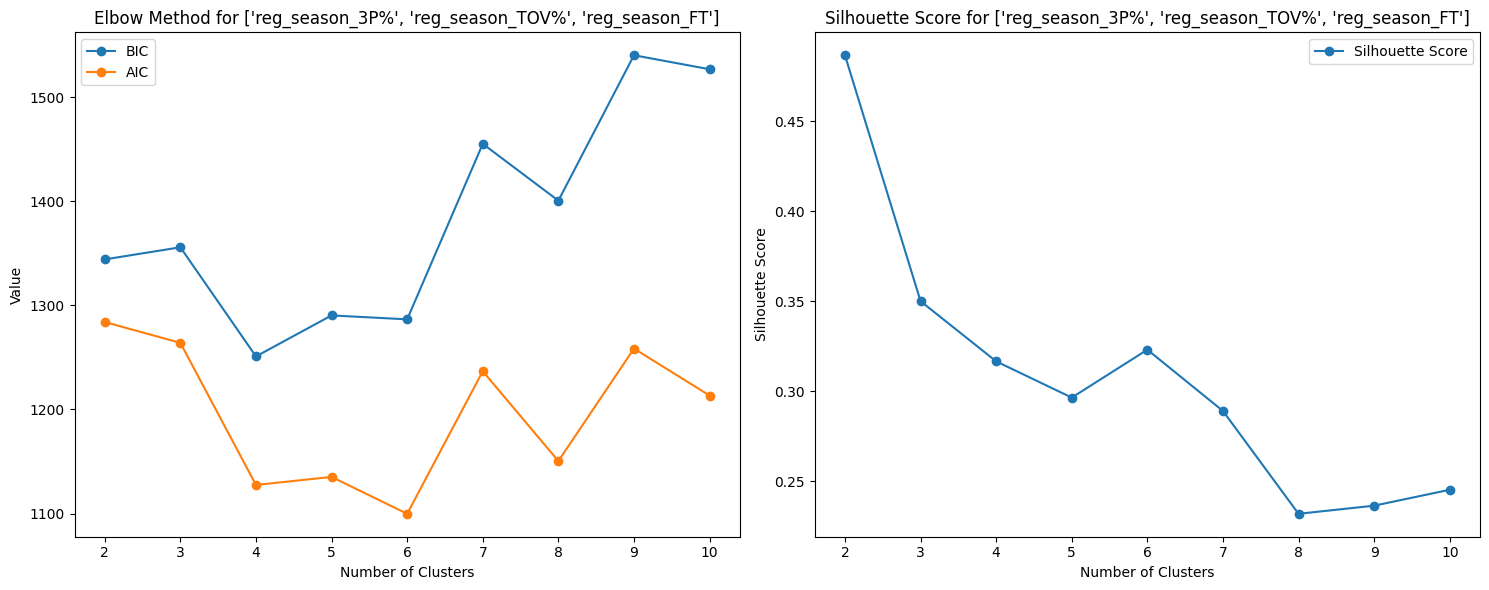

In [138]:
# Determine optimal clusters for the first grouping
bic_1, aic_1, silhouette_scores_1 = determine_optimal_clusters(df, grouping_1_features)

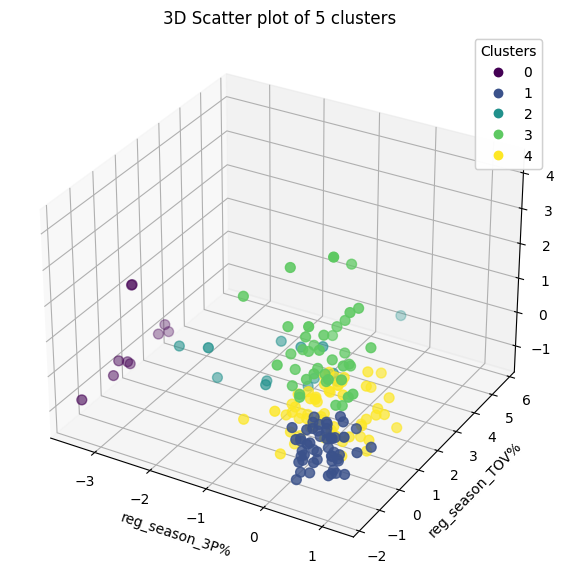

In [139]:
# Perform GMM with 6 clusters for the first grouping
grouping_1_result_clusters = perform_gmm_and_visualize(df.copy(), grouping_1_features, 5)

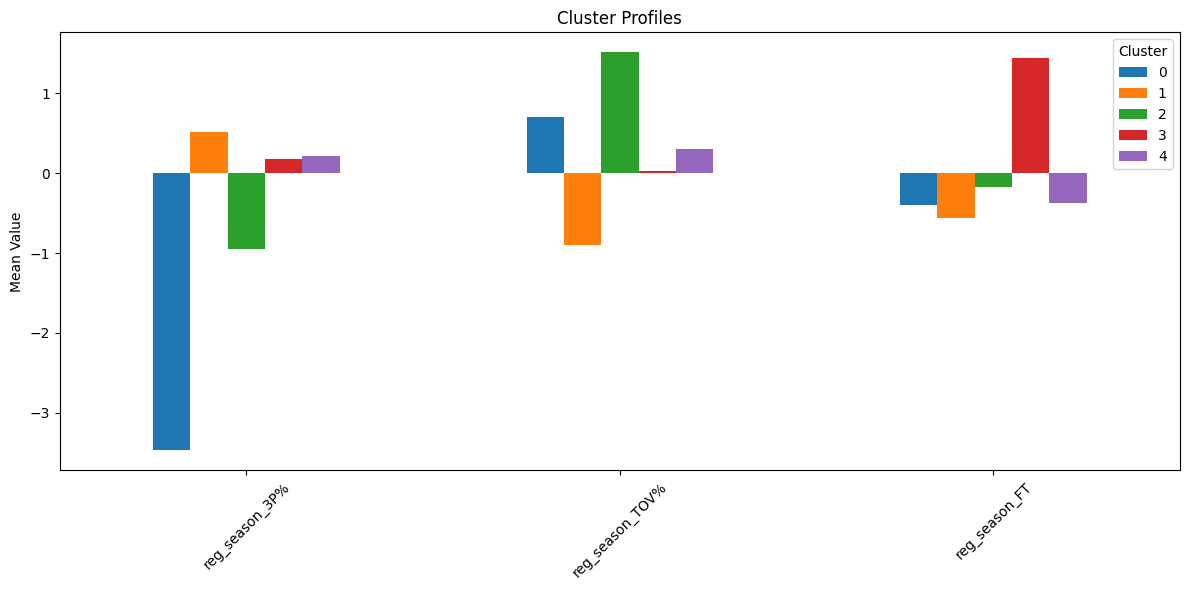

In [140]:
# Plot cluster profiles for the first grouping
cluster_profiles(grouping_1_result_clusters, grouping_1_features, 'Cluster')

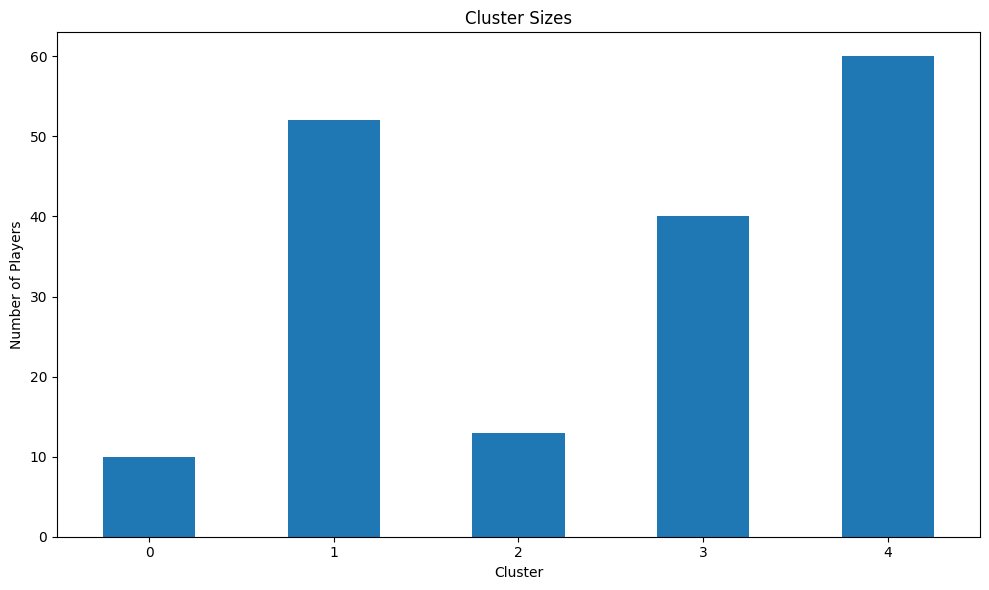

In [141]:
# Plot cluster sizes for the first grouping
plot_cluster_sizes(grouping_1_result_clusters, 'Cluster')

/Users/giovanni-lunetta/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


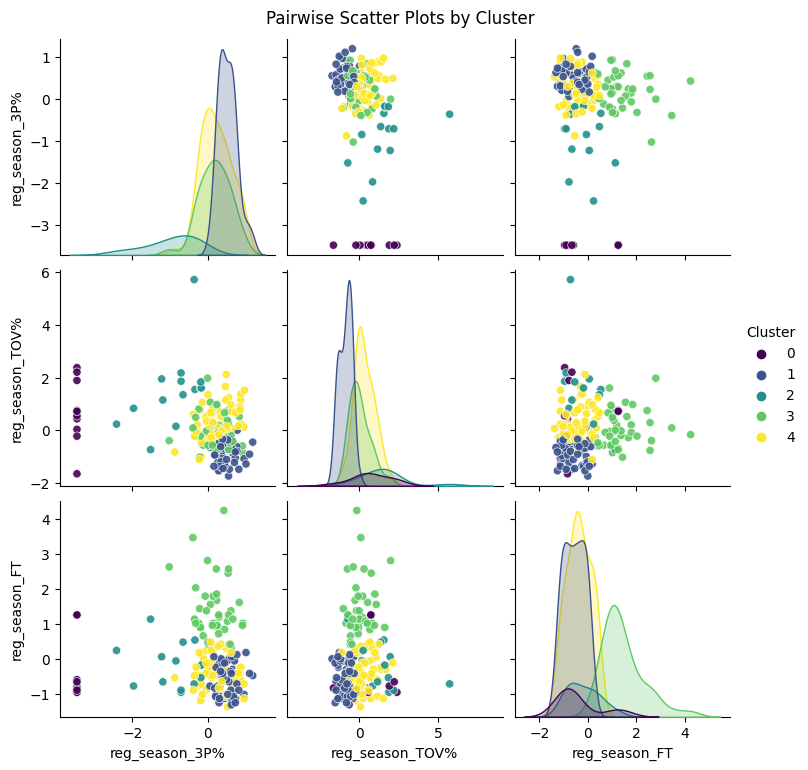

In [142]:
# Plot pairwise scatter plots for the first grouping
pairwise_scatter_plots(grouping_1_result_clusters, grouping_1_features, 'Cluster')

# Grouping 2

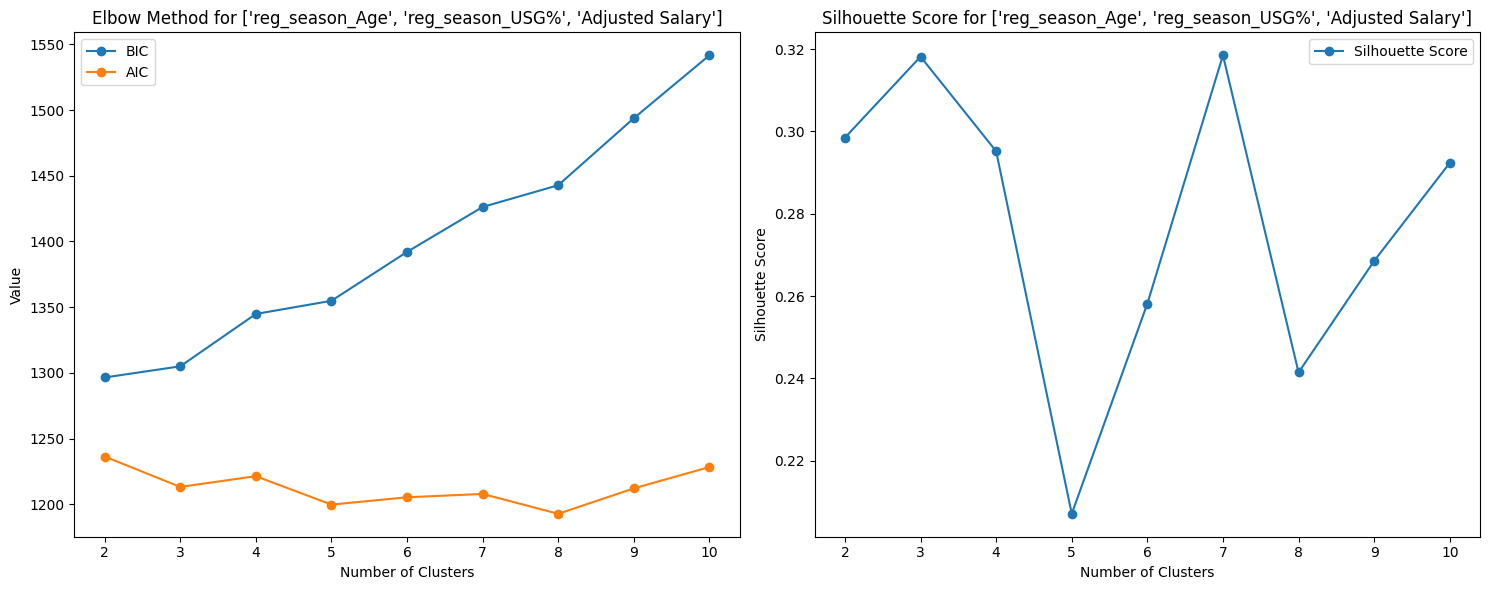

In [143]:
# Determine optimal clusters for the second grouping
bic_2, aic_2, silhouette_scores_2 = determine_optimal_clusters(df, grouping_2_features)

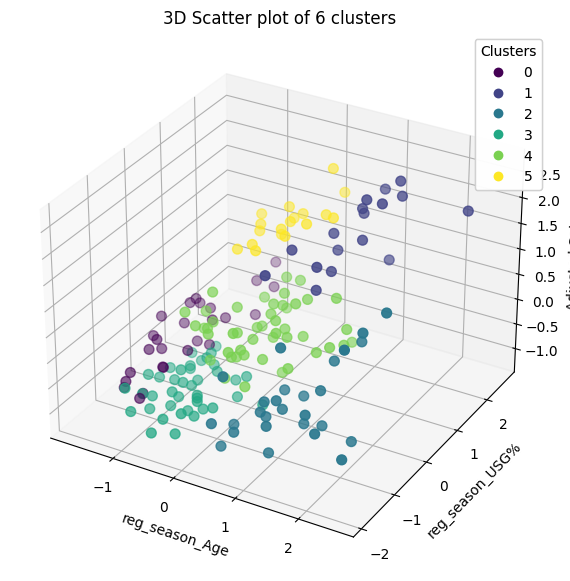

,Player_Cleaned,reg_season_Age,reg_season_USG%,Adjusted Salary,Cluster
0,traeyoung,-0.788514,2.129152,-0.539739,0
1,christianwood,-0.074773,0.331413,-0.085905,4
2,ziairewilliams,-1.502255,-1.029038,-0.875719,0
3,robertwilliams,-0.550600,-1.579696,-0.936149,3
4,andrewwiggins,-0.074773,0.299022,1.436399,5


In [144]:
# Perform GMM with 6 clusters for the second grouping
grouping_2_result_6_clusters = perform_gmm_and_visualize(df.copy(), grouping_2_features, 6)
grouping_2_result_6_clusters.head()

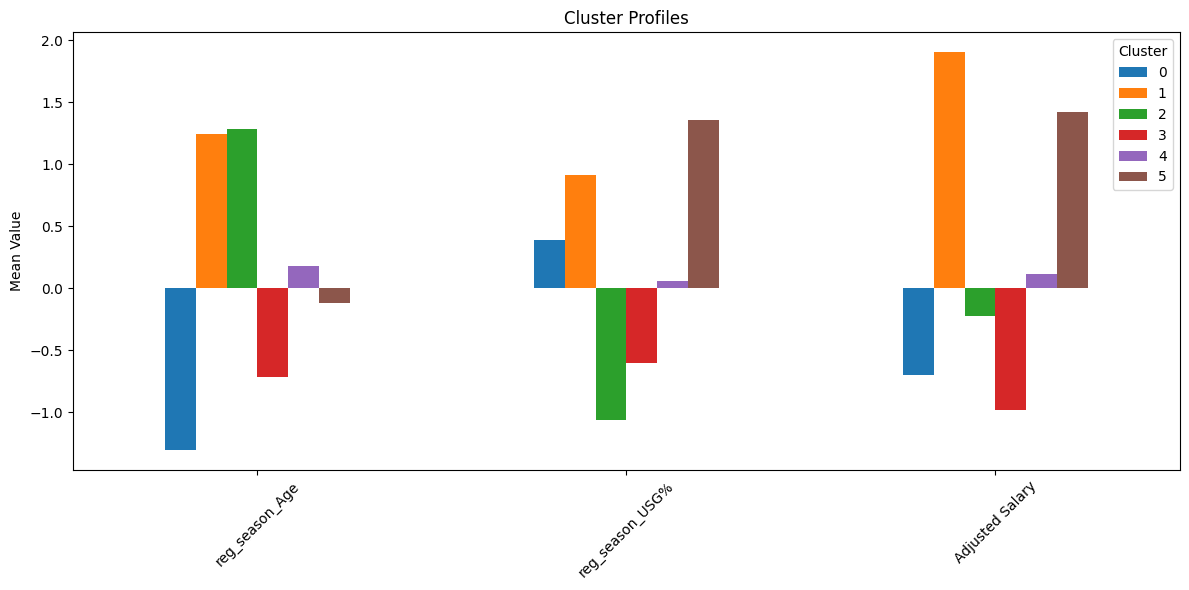

In [145]:
# Plot cluster profiles for the second grouping
cluster_profiles(grouping_2_result_6_clusters, grouping_2_features, 'Cluster')

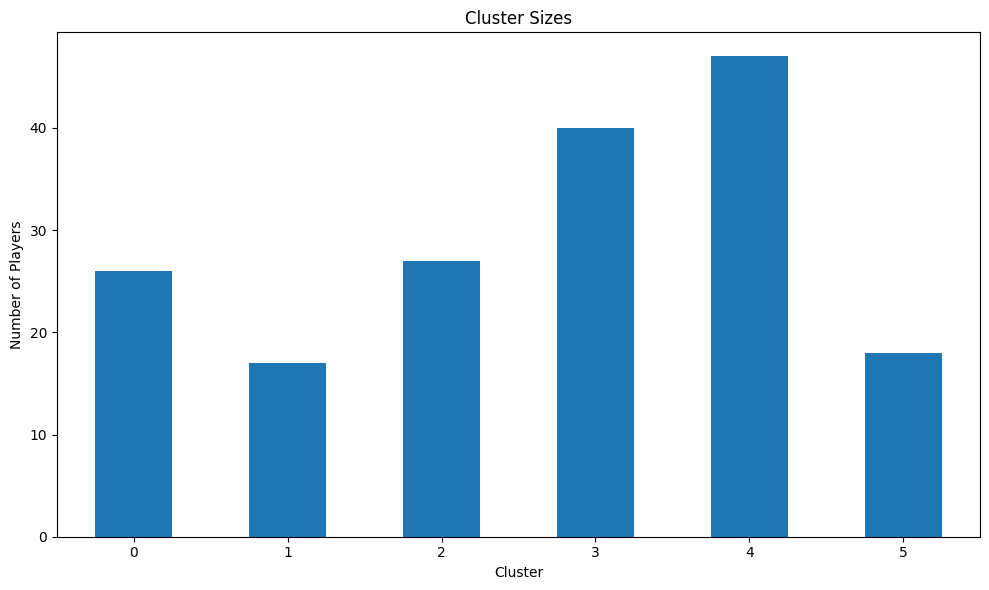

In [146]:
# Plot cluster sizes for the second grouping
plot_cluster_sizes(grouping_2_result_6_clusters, 'Cluster')

/Users/giovanni-lunetta/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


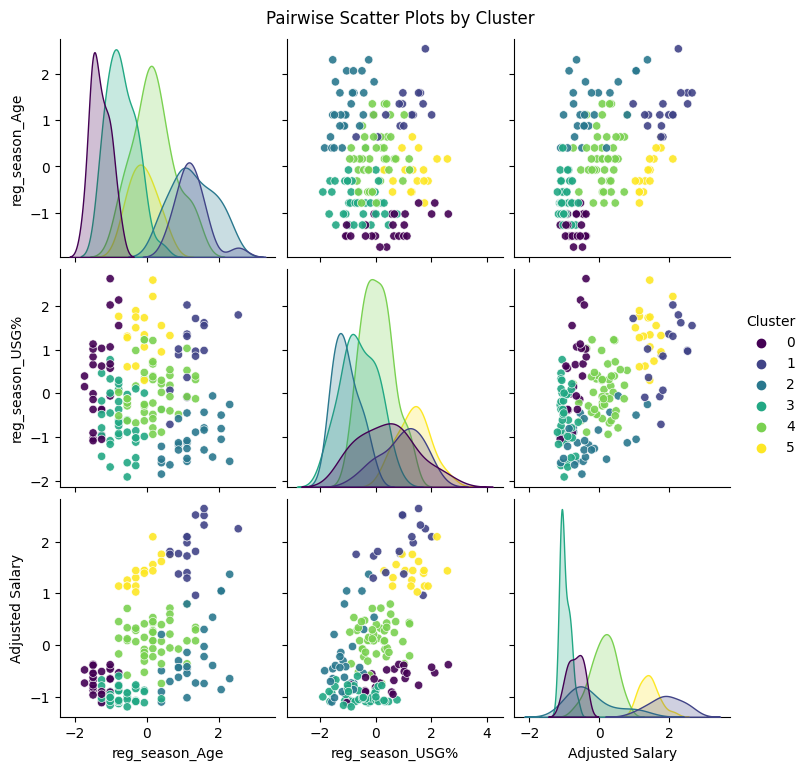

In [147]:
# Plot pairwise scatter plots for the second grouping
pairwise_scatter_plots(grouping_2_result_6_clusters, grouping_2_features, 'Cluster')

## Grouping 1 Insights:

### Players' Stats:
- **Stephen Curry, Damian Lillard, James Harden, Devin Booker, and Bradley Beal (Cluster 0)**: They all have above-average three-point shooting percentages, except for Beal who is slightly below average. Curry and Booker have notably high values. Harden has the highest free-throw rate, indicating he gets to the line very frequently. Irving also has a good mix of three-point shooting and getting to the free-throw line, with a low turnover rate. All these players have high free-throw rates, indicating they are proficient at getting to the line.

- **Chris Paul, Donovan Mitchell, and Kyrie Irving (Cluster 3)**: They all have good three-point percentages, with Irving standing out. Their turnover rates are lower than those in Cluster 0, with Irving having the lowest, indicating excellent ball-handling. However, their free-throw rates are around average.

### Cluster Averages:
- **Cluster 0**: Average three-point shooting, average turnovers, and high free-throw rates.
- **Cluster 3**: Better three-point shooting and ball-handling (lower turnover rates) than Cluster 0, but average free-throw rates.

## Grouping 2 Insights:

### Players' S
tats:
- **Chris Paul, Damian Lillard, James Harden, and Stephen Curry (Cluster 4)**: These players are older on average and have moderate to high usage rates, indicating they are primary options on their teams. Curry has the highest adjusted salary, reflecting his value.

- **Donovan Mitchell, Kyrie Irving, Devin Booker, and Bradley Beal (Cluster 1)**: These players have high usage rates, suggesting they are heavily involved in their teams' offenses, which could correlate with ball-handling responsibilities. They are also well-valued, indicated by their adjusted salaries.

### Cluster Averages:
- **Cluster 1**: Slightly younger players with very high usage rates and high adjusted salaries.
- **Cluster 4**: Older players with moderate usage rates and high adjusted salaries.

## Conclusions and Recommendations for Young Players:
- **For three-point shooting**: Devin Booker and Stephen Curry are the best among the young players, with Irving also being exceptional.
- **For low turnover rate**: Kyrie Irving and Devin Booker have the lowest turnover rates among the young players, indicating strong ball-handling skills.
- **For getting to the free-throw line**: James Harden stands out, but since he is older, Devin Booker may be a better choice for long-term plans given his free-throw rate and young age.

---

# Cleveland Cavaliers Player Acquisition Analysis Report

## Executive Summary:
The Cleveland Cavaliers' analytics team has conducted an in-depth analysis to identify potential player acquisitions that align with the team's strategic goals. The focus is on young players who excel in three-point shooting, exhibit efficient ball-handling with low turnover rates, and have a propensity to draw fouls leading to free-throw opportunities. Donovan Mitchell has been identified as a prime candidate fitting these criteria.

## Player Profile Analysis:

1. **Three-Point Shooting**:
   Donovan Mitchell's standardized three-point shooting percentage is above the league's average, showcasing his ability to contribute significantly to the Cavaliers' perimeter scoring. His proficiency from beyond the arc will space the floor and provide offensive versatility.

2. **Ball Handling and Turnover Rate**:
   Mitchell's turnover rate is commendably close to average, which is noteworthy given his high usage rate. This suggests that Mitchell possesses the necessary ball-handling skills to operate as a primary playmaker and scorer without compromising ball security.

3. **Free-Throw Rate**:
   Our analysis indicates that Mitchell frequently gets to the free-throw line, an essential aspect of maintaining offensive efficiency. His ability to draw fouls and convert free throws will be invaluable during close games and clutch situations.

4. **Age and Longevity**:
   Mitchell falls within a younger player cohort, which is ideal for the Cavaliers' long-term competitive aspirations. His age suggests that he is likely to maintain or improve upon his current performance levels in the foreseeable future.

5. **Usage Rate and Team Impact**:
   With a high usage rate, Mitchell is accustomed to being a focal point in the offensive scheme. This experience is expected to translate well to the Cavaliers' system, providing a reliable option for shot creation and offensive initiation.

6. **Financial and Contractual Considerations**:
   Mitchell's adjusted salary is reflective of his high value in the league. While he may command a significant investment, his potential impact on the team's performance justifies the expenditure.

## Recommendation:
Based on our comprehensive analysis, we recommend that the Cleveland Cavaliers prioritize the acquisition of Donovan Mitchell. His alignment with our strategic criteria, coupled with his youth and proven track record, make him an outstanding fit for our team's current and future needs. Mitchell's addition is projected to enhance our offensive capabilities significantly, improve our backcourt depth,